In [49]:
import hvplot.pandas
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

# Import API key
from geoapify import geoapify_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [50]:
csv_path = 'data/VPA_Open_Space.csv'

read_csv = pd.read_csv(csv_path)

information_df = pd.DataFrame(read_csv)

information_df.sample(5)

,FID,LGA,VM_PARCEL_,VM_PARCE_1,DATA_SOURC,OS_CATEGOR,OS_CATEG_2,OWNER_TYPE,PARK_NAME,OS_STATUS,...,VEAC_ID,WATER_BODY,OS_TYPE,COASTAL,MANAGER_NA,OWNER_NAME,Image_URL,VPA_ID,SHAPE_Length,SHAPE_Area
13046,13047,WYNDHAM,1\PS416524,52612239,DEECD,Non-government schools,Not applicable,Private,Thomas Carr Catholic College,Existing,...,,,Private open space,,NO DATA,NO DATA,https://lh3.googleusercontent.com/-uz6koGrYKZE...,14215,0.013788,1.018816e-05
37589,37590,FRANKSTON,3A~9\PP5301,52477606,VM CL Parcels,Sportsfields and organised recreation,Not applicable,Crown,Victoria Park,Existing,...,P363008,,Public open space,,NO DATA,Crown,https://lh3.googleusercontent.com/-IeXcYfXdodo...,38046,0.006057,2.132036e-06
18541,18542,WHITTLESEA,1\TP907768,2024052,VM Parcels,Natural and semi-natural open space,Not applicable,Local government,W.A. Smith Recreation Reserve,Existing,...,M016886,,Public open space,,NO DATA,Whittlesea City Council,https://lh3.googleusercontent.com/-mCSb2HRxCUs...,19362,0.001402,5.494702e-08
17630,17631,WHITTLESEA,2\PS604290,220265014,VM Parcels,Parks and gardens,Not applicable,Local government,,Existing,...,,,Public open space,,NO DATA,Whittlesea City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,18282,0.007243,2.739909e-06
21006,21007,MORELAND,67\LP10503,52821078,VM Parcels,Natural and semi-natural open space,Local link,NO DATA,NO DATA,Existing,...,M011112,,Public open space,,NO DATA,NO DATA,https://lh3.googleusercontent.com/-mCSb2HRxCUs...,22001,0.001163,6.939144e-08


In [51]:
information_df_parks_df = information_df.loc[(information_df['OS_TYPE'] == 'Public open space')]
information_df_parks_df.sample(5)

,FID,LGA,VM_PARCEL_,VM_PARCE_1,DATA_SOURC,OS_CATEGOR,OS_CATEG_2,OWNER_TYPE,PARK_NAME,OS_STATUS,...,VEAC_ID,WATER_BODY,OS_TYPE,COASTAL,MANAGER_NA,OWNER_NAME,Image_URL,VPA_ID,SHAPE_Length,SHAPE_Area
9,10,BOROONDARA,266\LP5481,203971950,VM Parcels,Sportsfields and organised recreation,Not applicable,Local government,Jack Otoole Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-IeXcYfXdodo...,1509,0.001683,1.389664e-07
30159,30160,MORNINGTON,1\PS413576,52538576,Mornington shire,Natural and semi-natural open space,Not applicable,Local government,Hilltop Ave Blairgowrie bushland,Existing,...,M033142,,Public open space,,NO DATA,Mornington Peninsula Shire,https://lh3.googleusercontent.com/-mCSb2HRxCUs...,31248,0.001171,6.668642e-08
30146,30147,MORNINGTON,RES3\LP30065,2022398,Mornington shire,Natural and semi-natural open space,Not applicable,Local government,Phillipa St Blairgowrie bushland,Existing,...,M033047,,Public open space,,Mornington Shire Council,Mornington Peninsula Shire,https://lh3.googleusercontent.com/-mCSb2HRxCUs...,31246,0.001091,6.318599e-08
10579,10580,MELTON,RES2\PS602795,208251520,VM Parcels,Parks and gardens,Not applicable,Local government,Glencarpel Court Reserve,Existing,...,M018363,,Public open space,,NO DATA,Melton City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,11295,0.001590,1.459564e-07
13721,13722,WYNDHAM,RES1\LP91620,1792276,ARCUE2002,Recreation corridor,Local link,Local government,Marlborough Willmott Drive Walkway,Existing,...,M018768,,Public open space,,NO DATA,Wyndham City Council,https://lh3.googleusercontent.com/-YzyOGz7u_dk...,14104,0.001630,1.129566e-07


In [52]:
lga_list = pd.DataFrame(information_df_parks_df.groupby('LGA')['PARK_NAME'].count().sort_values(ascending = False).index)

lga_bucket = []

for i in range(len(lga_list)):
    lga_bucket.append(str(lga_list['LGA'][i].title()))

lga_park_count = pd.DataFrame(information_df_parks_df.groupby('LGA')['PARK_NAME'].count().sort_values(ascending = False))

lga_park_count = lga_park_count['PARK_NAME'].reset_index('LGA')

park_count = []

for i in range(len(lga_park_count)):
    park_count.append(int(lga_park_count['PARK_NAME'][i]))
    

In [53]:
lga_park_count_df = pd.DataFrame({"Local Government Area" : lga_bucket, 
                                  "Public Open Spaces" : park_count})


In [54]:
column_names = ['LGA code', 'Local Government Area', '2021 Population', '2022 Population', '% Population Change 21-22', 'Area (km2)', 'Population Density (persons/km2)'
            ]

lga_information_path = pd.read_excel('data/LGA_ABS_data_21_22.xlsx', 
                                     sheet_name = 2, 
                                     header = 7,
                                     names = column_names,
                                     usecols = 'A,B,C,D,G,M,N',
                                     skiprows = 1,
                                     na_values = 0)

lga_information = pd.DataFrame(lga_information_path)

lga_information.sample(30)

,LGA code,Local Government Area,2021 Population,2022 Population,% Population Change 21-22,Area (km2),Population Density (persons/km2)
71,26890,West Wimmera,3978.0,3942.0,-0.9,9108.7,0.4
36,23810,Latrobe (Vic.),77117.0,77668.0,0.7,1425.6,54.5
58,25900,Port Phillip,103438.0,103990.0,0.5,20.6,5044.6
16,21830,Corangamite,16030.0,15993.0,-0.2,4407.5,3.6
26,22750,Greater Geelong,270932.0,276446.0,2.0,1248.0,221.5
33,23350,Indigo,17251.0,17418.0,1.0,2040.5,8.5
55,25620,Murrindindi,15139.0,15348.0,1.4,3879.8,4.0
52,25340,Mornington Peninsula,170440.0,169663.0,-0.5,724.0,234.3
23,22490,Golden Plains,24892.0,25312.0,1.7,2703.4,9.4
31,23190,Horsham,20376.0,20337.0,-0.2,4266.8,4.8


In [55]:
columns_to_check = ['LGA code', 'Local Government Area']
lga_information_cleaned = lga_information.dropna(subset= columns_to_check, how = 'any')

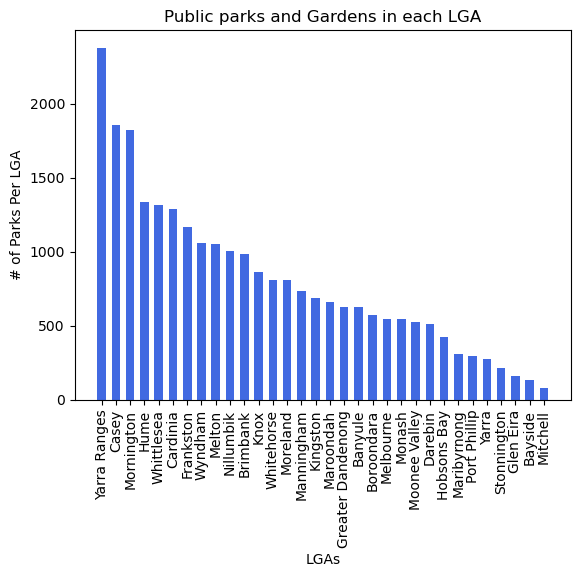

In [56]:
x_axis = np.arange(len(lga_bucket))

plt.bar(x_axis, park_count, color="royalblue", align="center", width = 0.6)
tick_locations = [value for value in x_axis]
tick_locations
plt.xticks(tick_locations, lga_bucket, rotation = 90)
plt.xlabel('LGAs')
plt.ylabel('# of Parks Per LGA')
plt.title('Public parks and Gardens in each LGA')

plt.show()

In [57]:
columns_to_check = ['LGA code', 'Local Government Area']
lga_information_cleaned = lga_information.dropna(subset= columns_to_check, how = 'any')


In [58]:
lga_filtered = lga_information_cleaned.loc[lga_information_cleaned['Local Government Area'].isin(lga_bucket)]
lga_filtered = lga_filtered.reset_index(drop = True)

In [59]:
merged_vic_data_df = pd.merge(lga_filtered, lga_park_count_df, how = 'inner', on = 'Local Government Area')
merged_vic_data_df.to_csv('data/merged_vic_data.csv')

In [60]:
merged_vic_data_df.head()

,LGA code,Local Government Area,2021 Population,2022 Population,% Population Change 21-22,Area (km2),Population Density (persons/km2),Public Open Spaces
0,20660,Banyule,127370.0,127348.0,NaN,62.5,2036.3,625
1,21110,Boroondara,169789.0,169500.0,-0.2,60.2,2816.7,576
2,21180,Brimbank,196631.0,193256.0,-1.7,123.4,1566.1,986
3,21450,Cardinia,119573.0,123104.0,3.0,1282.6,96.0,1287
4,21610,Casey,369558.0,378831.0,2.5,409.4,925.3,1853


In [61]:
merged_vic_data_df.sort_values(by = ['Public Open Spaces'] ,ascending = False)

,LGA code,Local Government Area,2021 Population,2022 Population,% Population Change 21-22,Area (km2),Population Density (persons/km2),Public Open Spaces
28,27450,Yarra Ranges,157421.0,157388.0,NaN,2468.2,63.8,2376
4,21610,Casey,369558.0,378831.0,2.5,409.4,925.3,1853
10,23270,Hume,246920.0,252987.0,2.5,503.8,502.1,1333
25,27070,Whittlesea,231831.0,236966.0,2.2,489.7,483.9,1316
3,21450,Cardinia,119573.0,123104.0,3.0,1282.6,96.0,1287
6,22170,Frankston,140824.0,141078.0,0.2,129.6,1088.6,1166
26,27260,Wyndham,296322.0,309125.0,4.3,542.1,570.2,1056
16,24650,Melton,181346.0,193155.0,6.5,527.5,366.1,1055
21,25710,Nillumbik,63450.0,63041.0,-0.6,432.3,145.8,1007
2,21180,Brimbank,196631.0,193256.0,-1.7,123.4,1566.1,986


In [62]:
Location_merged_map_ploting = merged_vic_data_df

In [63]:
# Add columns the airports data we will fetch using the Geoapify API
# Note that we used "" to specify initial entry.
Location_merged_map_ploting["Lat"] = ""
Location_merged_map_ploting["Lon"] = ""

Location_merged_map_ploting.head()

,LGA code,Local Government Area,2021 Population,2022 Population,% Population Change 21-22,Area (km2),Population Density (persons/km2),Public Open Spaces,Lat,Lon
0,20660,Banyule,127370.0,127348.0,NaN,62.5,2036.3,625,,
1,21110,Boroondara,169789.0,169500.0,-0.2,60.2,2816.7,576,,
2,21180,Brimbank,196631.0,193256.0,-1.7,123.4,1566.1,986,,
3,21450,Cardinia,119573.0,123104.0,3.0,1282.6,96.0,1287,,
4,21610,Casey,369558.0,378831.0,2.5,409.4,925.3,1853,,


In [64]:
# Define the API parameters
params = {
    "apiKey":geoapify_key,
    "format":"json"
}

# Set the base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

In [65]:
# Loop through the cities_pd DataFrame and search coordinates for each city
for index, row in Location_merged_map_ploting.iterrows():

    # Get the city's name & add ", Australia" to the string so geoapify finds the correct city
    city = row["Local Government Area"] + ", Victoria,Australia"

    # Add the current city to the parameters
    params["text"] = f"{city}"

    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert reponse to JSON
    response = response.json()

    # Extract latitude and longitude
    Location_merged_map_ploting.loc[index, "Lat"] = response["results"][0]["lat"]
    Location_merged_map_ploting.loc[index, "Lon"] = response["results"][0]["lon"]
    
    # Log the search results
    print(f"Coordinates for {city} fetched...")

# Display sample data to confirm that the coordinates appear
Location_merged_map_ploting.sample(20)

Coordinates for Banyule, Victoria,Australia fetched...
Coordinates for Boroondara, Victoria,Australia fetched...
Coordinates for Brimbank, Victoria,Australia fetched...
Coordinates for Cardinia, Victoria,Australia fetched...
Coordinates for Casey, Victoria,Australia fetched...
Coordinates for Darebin, Victoria,Australia fetched...
Coordinates for Frankston, Victoria,Australia fetched...
Coordinates for Glen Eira, Victoria,Australia fetched...
Coordinates for Greater Dandenong, Victoria,Australia fetched...
Coordinates for Hobsons Bay, Victoria,Australia fetched...
Coordinates for Hume, Victoria,Australia fetched...
Coordinates for Knox, Victoria,Australia fetched...
Coordinates for Manningham, Victoria,Australia fetched...
Coordinates for Maribyrnong, Victoria,Australia fetched...
Coordinates for Maroondah, Victoria,Australia fetched...
Coordinates for Melbourne, Victoria,Australia fetched...
Coordinates for Melton, Victoria,Australia fetched...
Coordinates for Mitchell, Victoria,Austr

,LGA code,Local Government Area,2021 Population,2022 Population,% Population Change 21-22,Area (km2),Population Density (persons/km2),Public Open Spaces,Lat,Lon
2,21180,Brimbank,196631.0,193256.0,-1.7,123.4,1566.1,986,-37.742717,144.805427
11,23670,Knox,160481.0,159465.0,-0.6,113.9,1399.9,862,-37.898453,145.264856
7,22310,Glen Eira,150638.0,151694.0,0.7,38.7,3920.7,160,-37.89914,145.041033
16,24650,Melton,181346.0,193155.0,6.5,527.5,366.1,1055,-37.683571,144.582845
13,24330,Maribyrnong,86385.0,87526.0,1.3,31.2,2803.0,307,-37.769514,144.890205
12,24210,Manningham,125821.0,126491.0,0.5,113.3,1116.0,736,-37.757136,145.185245
17,24850,Mitchell,49712.0,51654.0,3.9,2862.1,18.0,80,-37.175751,144.976528
19,25060,Moonee Valley,122950.0,123038.0,0.1,43.1,2852.2,526,-37.749434,144.886887
8,22670,Greater Dandenong,160100.0,159151.0,-0.6,129.5,1228.5,626,-38.001215,145.187055
27,27350,Yarra,91521.0,92301.0,0.9,19.5,4723.2,275,-37.804851,144.986615


In [67]:
# Configure the map
map_plot_2 = Location_merged_map_ploting.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "EsriImagery",
    frame_width = 800,
    frame_height = 600,
    size = "Population Density (persons/km2)",
    scale = 0.5,
    color = "Local Government Area"
)

# Display the map plot
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (Local Government Area,Population Density (persons/km2))